In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle


sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import ProjectionHelper
from vicon_recordings.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_recordings.src import vis_utils, utils

In [2]:
np.random.seed(0)

In [3]:
# generate the set of 3d points in world coordinates

n_points = 13
vmax = 300
vmin = 100
world_points = np.random.rand(n_points, 3) * vmax + vmin
# in homogeneous coordinates
world_points_h = np.hstack((world_points, np.ones((n_points, 1))))

In [9]:
rand_frame_off = np.zeros((4, 4))
t = np.random.rand(1, 3) * 20
r = np.random.rand(1, 3) * np.pi / 8 + np.array([np.pi / 2, 0.0, 0.0])

rand_frame_off[:3, :3] = Rotation.from_euler('xyz', t).as_matrix()
rand_frame_off[:-1, -1] = t
rand_frame_off[-1, -1] = 1

print(rand_frame_off)
print(np.linalg.inv(rand_frame_off))

[[-0.59926072 -0.16981316  0.7823363   0.78375585]
 [ 0.54461434 -0.80273364  0.24292782  5.65613925]
 [ 0.58675532  0.57164867  0.57352942  2.40393122]
 [ 0.          0.          0.          1.        ]]
[[-0.59926072  0.54461434  0.58675532 -4.02125991]
 [-0.16981316 -0.80273364  0.57164867  3.29926121]
 [ 0.7823363   0.24292782  0.57352942 -3.36591949]
 [ 0.          0.          0.          1.        ]]


In [10]:
# generate n random frames

n_frames = 3
vmax = 50
vmin = 0
frames_t = np.random.rand(n_frames, 3) * vmax + vmin
frames_r = np.random.rand(n_frames, 3) * np.pi / 4 # limit the rotation

frames_T = np.zeros((n_frames, 4, 4))
for i, T in enumerate(frames_T):
    t = frames_t[i]
    r = frames_r[i]

    T[:3, :3] = Rotation.from_euler('xyz', r).as_matrix()
    T[:-1, -1] = t
    T[-1, -1] = 1.0

    T = rand_frame_off @ T



(13, 4)


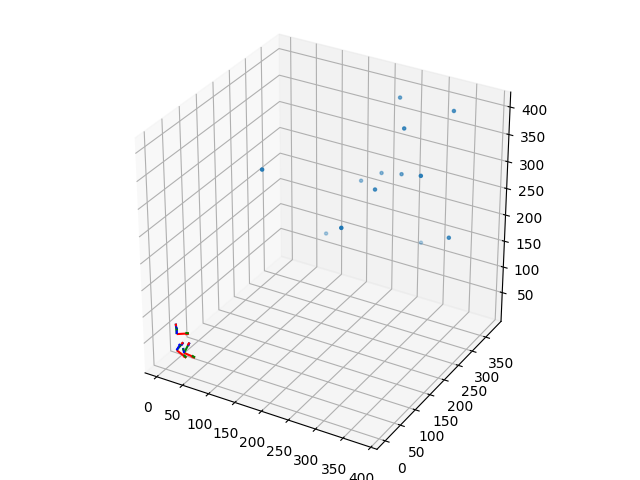

In [11]:
# plot points and frames
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

vis_utils.plot_points_3d(ax, world_points_h)

for T in frames_T:
    vis_utils.plot_frame(ax, T, arrow_length=20)

vis_utils.set_axes_equal(ax)
plt.tight_layout()
plt.show()